# Experimento 01
---
Ejemplo de los modelos clásicos de epidemias, los modelos de movimiento y los modelos epidémicos con metapoblaciones. En este `notebook` se utiliza `solve_ivp` del módulo `scipy.integrate`, para resolver numéricamente estos sistemas de ecuaciones diferenciales.

In [3]:
# Para ubicar ruta en /MetapopulationEpidemicModels

import os
#os.chdir("..")
#os.chdir("..")
os.getcwd()

# IMPORTANTE!!! Solo correr UNA vez.

'/home/lachi/Documentos/Estudio/BioMat/articulos/MetapopulationEpidemicModels'

In [5]:
from scipy.integrate import solve_ivp
import models.original_models as om
import matplotlib.pyplot as plt
import numpy as np

## Modelos Epidémicos Clásicos


### Modelo SIR

En este modelo se consideran $3$ clases compartimentales: *Susceptibles*, *Infestados* y *Recuperados*.

$$
\begin{align*}
    \dot{S} & = - \beta \frac{S I}{N} \\ 
    \dot{I} & =   \beta \frac{S I}{N} - \gamma I \\
    \dot{R} & =   \gamma I
\end{align*}
$$
Considerando los parámetros $\beta = 0.25$ y $\gamma = 0.125$, además de los valores iniciales $S(t_0) = 2999 $, $ I(t_0) = 1 $, y $ R(t_0) = 0 $, el comportamiento del modelo resulta ser:

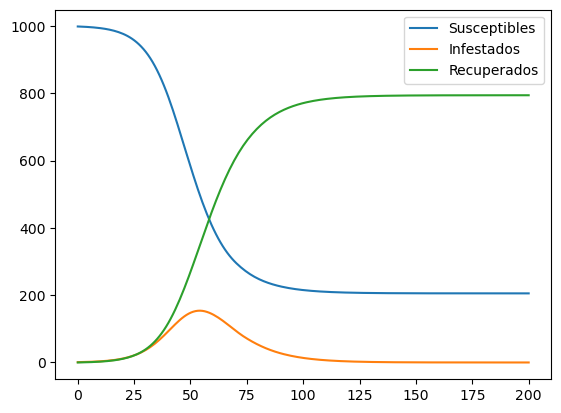

In [6]:
Beta = 0.25
Gamma = 0.125
sir_fun = om.fun_sir_model(Beta, Gamma, 1000)
sol_01 = solve_ivp(sir_fun, (0,200), np.array([999,1,0]), t_eval=np.linspace(0,200,200))

clases_01 = ['Susceptibles','Infestados','Recuperados']
for i, y in enumerate(sol_01.y):
    plt.plot(sol_01.t, y, label = clases_01[i])
plt.legend()
plt.show()

### Modelo SIS

En este modelo se consideran $2$ clases compartimentales: *Susceptibles* e *Infestados*.

$$
\begin{align*}
    \dot{S} & = - \beta \frac{S I}{N} + \gamma I \\ 
    \dot{I} & =   \beta \frac{S I}{N} - \gamma I \\
\end{align*}
$$
Considerando los parámetros $\beta = 0.25$ y $\gamma = 0.125$, además de los valores iniciales $S(t_0) = 2999 $ y $ I(t_0) = 1 $, el comportamiento del modelo resulta ser:

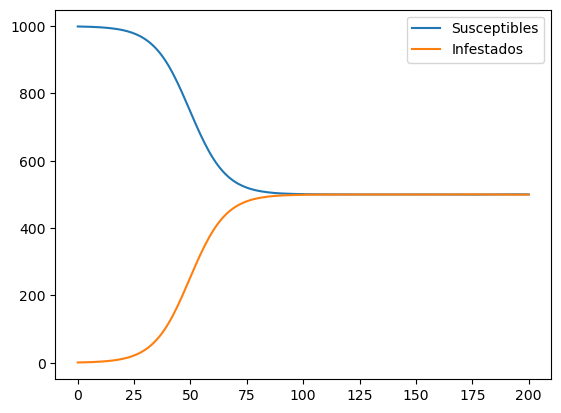

In [7]:
Beta = 0.25
Gamma = 0.125
sir_fun = om.fun_sis_model(Beta, Gamma, 1000)
sol_02 = solve_ivp(sir_fun, (0,200), np.array([999,1]), t_eval=np.linspace(0,200,200))

clases_02 = ['Susceptibles','Infestados']
for i, y in enumerate(sol_02.y):
    plt.plot(sol_01.t, y, label = clases_02[i])
plt.legend()
plt.show()

### Modelo SEIR

En este modelo se consideran $4$ clases compartimentales: *Susceptibles*, *Expuestos*, *Infestados* y *Recuperados*.

$$
\begin{align*}
    \dot{S} & = - \beta \frac{S I}{N} \\ 
    \dot{E} & =   \beta \frac{S I}{N} - \sigma E \\
    \dot{I} & =   \sigma E - \gamma I \\
    \dot{R} & =   \gamma I
\end{align*}
$$
Considerando los parámetros $\beta = 0.25$, $\gamma = 0.125$ y $\sigma = 0.35$, además de los valores iniciales $S(t_0) = 2999 $, $E(t_0) = 0$, $ I(t_0) = 1$ y $R(t_0) = 0$, el comportamiento del modelo resulta ser:

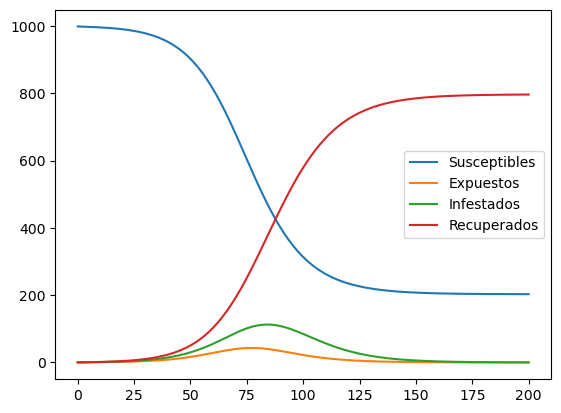

In [8]:
Beta = 0.25
Gamma = 0.125
Sigma = 0.35
sir_fun = om.fun_seir_model(Beta, Gamma, Sigma, 1000)
sol_03 = solve_ivp(sir_fun, (0,200), np.array([999,0,1,0]), t_eval=np.linspace(0,200,200))

clases_03 = ['Susceptibles','Expuestos','Infestados','Recuperados']
for i, y in enumerate(sol_03.y):
    plt.plot(sol_03.t, y, label = clases_03[i])
plt.legend()
plt.show()

## Modelos de Movimiento poblacional

### Modelo Euleriano
Este modelo considera que las personas se trasladan de una localización a otra por un tiempo indefinido. Para ello se consideran:
- $K$: regiones o localizaciones
- $N_i$: cantidad de habitantes de la localidad $i$
- $F_{ij}$: tasa de migración de la localidad $i$ a la $j$, $f_{ii} = 0, \forall i = 1,...,K$

El modelo quedaría:
$$
\begin{align*}
    \dot{N_i} & = - \sum_{j=1}^K f_{ij} N_i + \sum_{j=1}^K f_{ji} N_j , \qquad \forall i = 1,...,K
\end{align*}
$$
con $K$ ecuaciones y $K(K-1)$ parámetros. Utilizando $3$ nodos

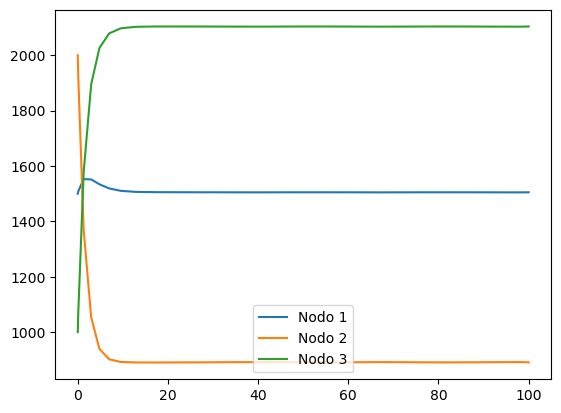

In [12]:
F1 = np.array([
    [0, 0.1, 0.2],
    [0.2, 0, 0.3],
    [0.13, 0.14, 0]
])
y0 = np.array([1500, 2000, 1000])
fun_flux_euler = om.fun_euler_mov(F1)
sol_04 = solve_ivp(fun_flux_euler, (0,100), y0)
clases = ['Nodo 1','Nodo 2','Nodo 3']
for i, y in enumerate(sol_04.y):
    plt.plot(sol_04.t, y, label = clases[i])
plt.legend()
plt.show()